<a href="https://colab.research.google.com/github/lucasantuneso/MVP-de-Engenharia-de-Dados/blob/main/futebol_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# MVP de Engenharia de Dados da PUC-Rio

**Aluno: Lucas Antunes de Oliveira**


### Perguntas que Gostaría de Responder com um Dataset de Futebol:

Antes de iniciar a busca por um dataset, defini as perguntas e objetivos que gostaria de responder e alcançar com a análise de dados do futebol. A ideia era abordar aspectos de desempenho, disciplina e emoção das partidas para entender melhor os fatores que influenciam o sucesso e a dinâmica do jogo.

### Perguntas e Objetivos

**Análise 1: Quais clubes recebem mais cartões amarelos e vermelhos por partida?**
- **Objetivo**: Avaliar a disciplina dos clubes em termos de cartões recebidos. Identificar quais clubes têm mais dificuldades em manter a disciplina durante as partidas, o que pode influenciar negativamente seu desempenho.

**Análise 2: Quais são os clubes mais vencedores?**
- **Objetivo**: Identificar os clubes que mais venceram partidas. Isso ajudará a entender quais são os clubes mais bem-sucedidos no campeonato e os fatores que podem contribuir para seu sucesso.

**Análise 3: Quais jogadores têm mais cartões?**
- **Objetivo**: Identificar os jogadores com mais cartões recebidos. Este insight é importante para analisar o comportamento individual dos jogadores em campo e sua influência na disciplina do time.

**Análise 4: Quais jogadores têm mais gols?**
- **Objetivo**: Identificar os jogadores mais eficientes em termos de gols marcados. A eficiência dos jogadores em marcar gols é crucial para o sucesso de um clube, e é importante destacar esses jogadores de destaque.

**Análise 5: Quais são os jogadores com mais minutos jogados?**
- **Objetivo**: Identificar os jogadores que jogaram mais tempo. Jogadores com mais minutos jogados são geralmente os mais confiáveis e importantes para suas equipes, e essa análise ajudará a identificar esses jogadores-chave.

**Análise 6: Quais são as partidas com maior número de gols?**
- **Objetivo**: Identificar as partidas mais emocionantes em termos de gols. Partidas com muitos gols são geralmente as mais emocionantes para os espectadores, e é interessante destacar esses jogos para entender melhor o que contribui para uma partida emocionante.


##1. Busca pelos dados



Após definir as perguntas e objetivos, foi necessário procurar um dataset que pudesse fornecer as informações necessárias para realizar essas análises. O dataset escolhido para este projeto foi o "Campeonato Brasileiro de Futebol" disponível no Kaggle. Este dataset foi selecionado porque contém informações detalhadas sobre jogadores, clubes, partidas e estatísticas de desempenho, essenciais para responder às perguntas formuladas.

#### Informações sobre o Dataset

- **Nome**: Campeonato Brasileiro de Futebol
- **Período**: 2003 a 2023
- **Total de Partidas**: 8404
- **Fonte dos Dados**: Coletados de páginas do Google
- **Validação dos Dados**: Rotinas foram criadas para validar as rodadas e a tabela do campeonato. A tabela do campeonato foi montada calculando os pontos de cada partida.

- [Link para o Dataset no Kaggle](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol?select=campeonato-brasileiro-gols.csv)


##2. Coleta
### Conjunto de Dados Utilizados

Os principais arquivos do dataset que foram utilizados:

- **campeonato-brasileiro-cartoes.csv**: Contém informações sobre os cartões recebidos pelos jogadores.
- **campeonato-brasileiro-gols.csv**: Contém dados sobre os gols marcados em cada partida.
- **campeonato-brasileiro-estatisticas-full.csv**: Inclui estatísticas detalhadas das partidas.
- **campeonato-brasileiro-full.csv**: Fornece informações gerais sobre as partidas.



Passo a Passo no Databricks:

- Criação do Cluster

1. **Configuração do Cluster**:
   - Como mostrado na primeira imagem, configuramos um cluster no Databricks.
   - Utilizamos o tipo de driver "Community Optimized" com 15.3 GB de memória, 2 núcleos e 1 DBU.
   - Este cluster é gratuito na edição Community, que encerra automaticamente após uma ou duas horas de inatividade.

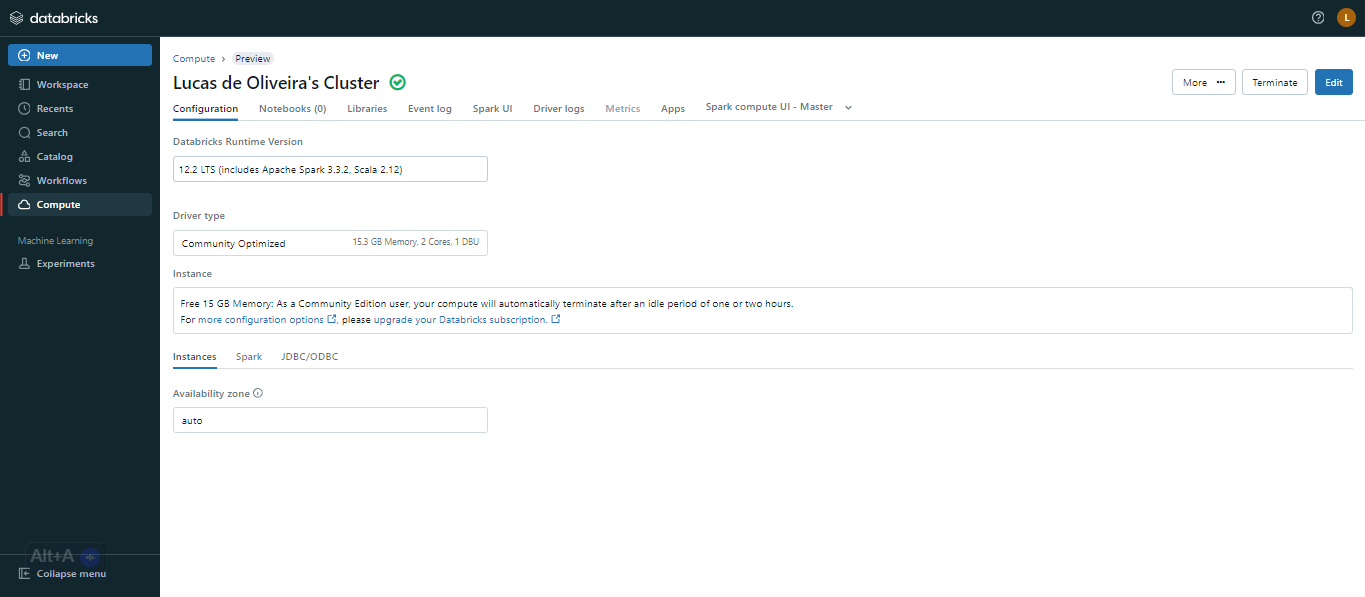

- Upload dos Arquivos CSV

2. **Upload dos Arquivos CSV**:
   - Na segunda imagem, foi carregado quatro arquivos CSV no Databricks:
     - `campeonato-brasileiro-cartoes.csv`
     - `campeonato-brasileiro-estatisticas-full.csv`
     - `campeonato-brasileiro-full.csv`
     - `campeonato-brasileiro-gols.csv`
   - Esses arquivos foram carregados no diretório `/FileStore/tables/`, que é acessível a todos no workspace.
   - Após o upload, é possivel criar tabelas a partir desses arquivos para facilitar o trabalho com os dados no Databricks.

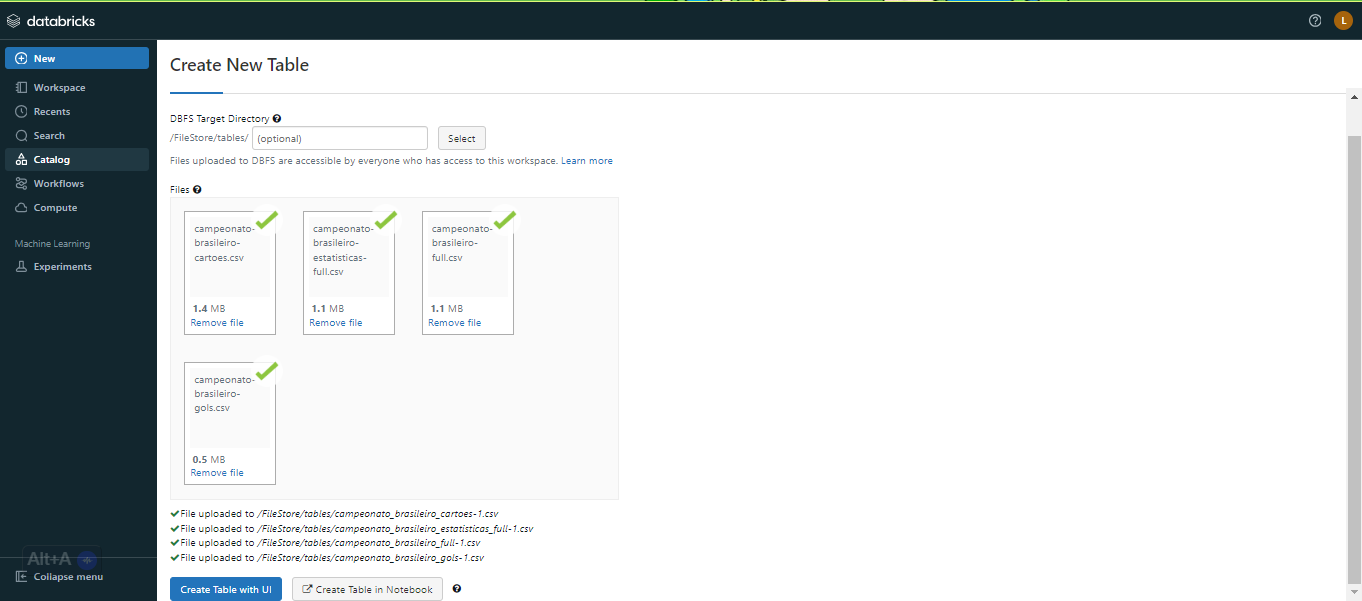

##3. Modelagem
### Estrutura de Dados e Modelagem

Para organizar e estruturar os dados, foi utilizado um Esquema Estrela. A modelagem foi realizada da seguinte maneira:

#### Tabela de Fatos: fatos_clubes
- **Colunas**:
  - clube
  - total_partidas_cartoes
  - total_cartoes_amarelos
  - total_cartoes_vermelhos
  - total_vitorias
  - media_cartoes_amarelos
  - media_cartoes_vermelhos

#### Tabelas Dimensionais
- **dim_jogadores**:
  - atleta
  - clube
  - num_camisa
  - posicao
- **dim_clubes**:
  - clube
  - arena
- **dim_partidas**:
  - ID
  - data
  - hora
  - mandante
  - visitante
  - mandante_Placar
  - visitante_Placar


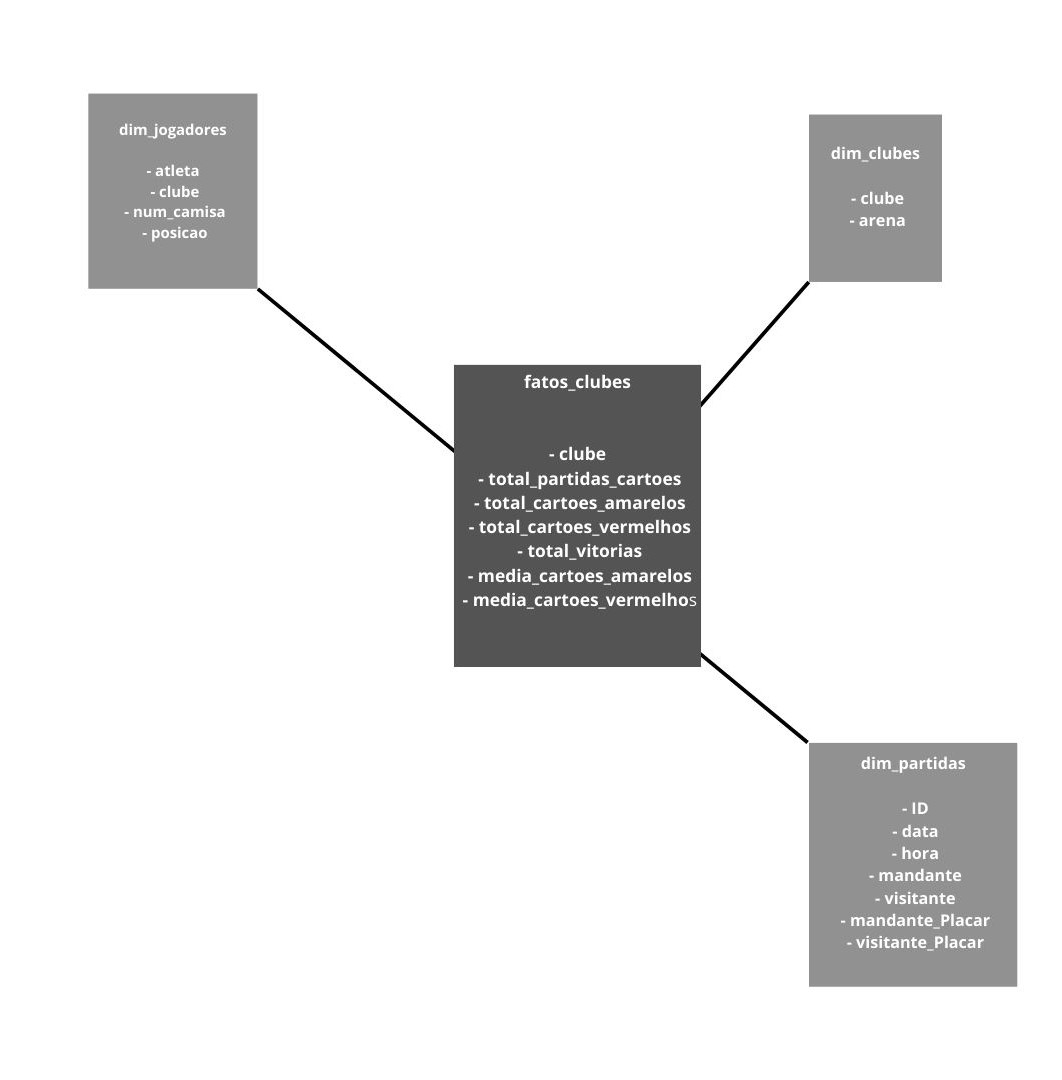

##4. Carga dos dados



###4.1. Camada bronze


- Leitura do Arquivo CSV no Databricks

Nessa etapa, foi configurada a localização e o tipo de arquivo CSV para leitura. Foram utilizadas opções de configuração como inferSchema, header, e delimiter para garantir que os dados fossem carregados corretamente. Em seguida, foi lido o arquivo CSV e exibido para verificar a estrutura e os dados carregados.

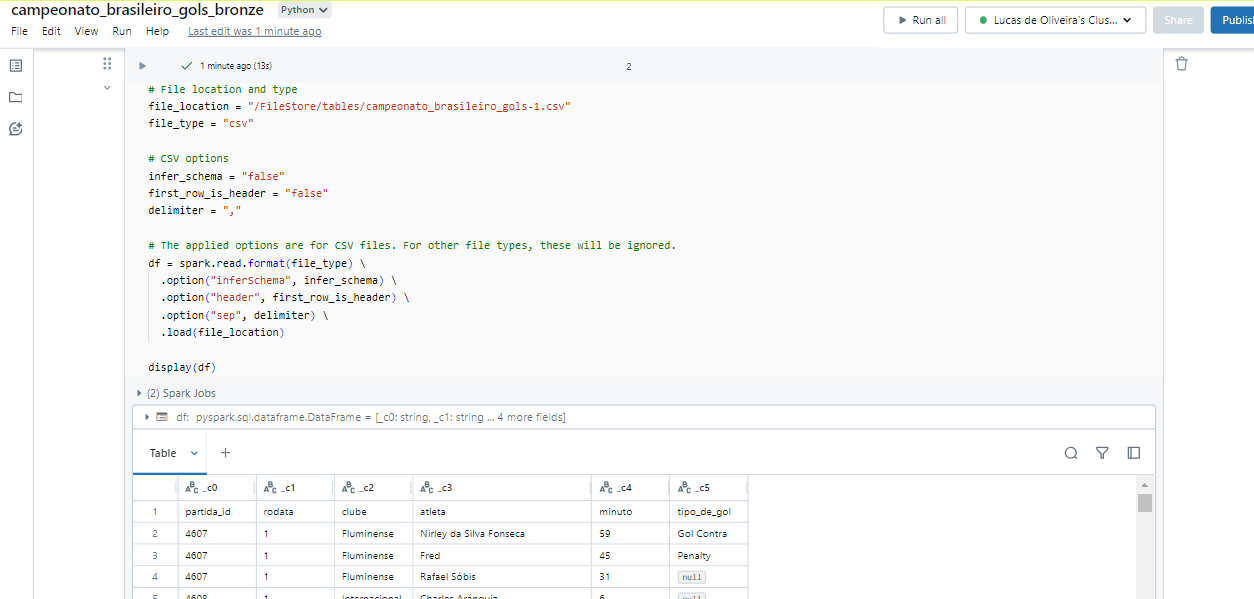

- Criação de Tabela Temporária

Criação de uma tabela temporária a partir do DataFrame lido anteriormente. Isso permite executar consultas SQL diretamente nos dados carregados, facilitando a análise e manipulação dos dados.

- Consulta SQL na Tabela Temporária

Foi executada uma consulta SQL na tabela temporária criada para visualizar os dados. Isso ajuda a garantir que os dados foram carregados corretamente e estão prontos para serem utilizados nas análises subsequentes.

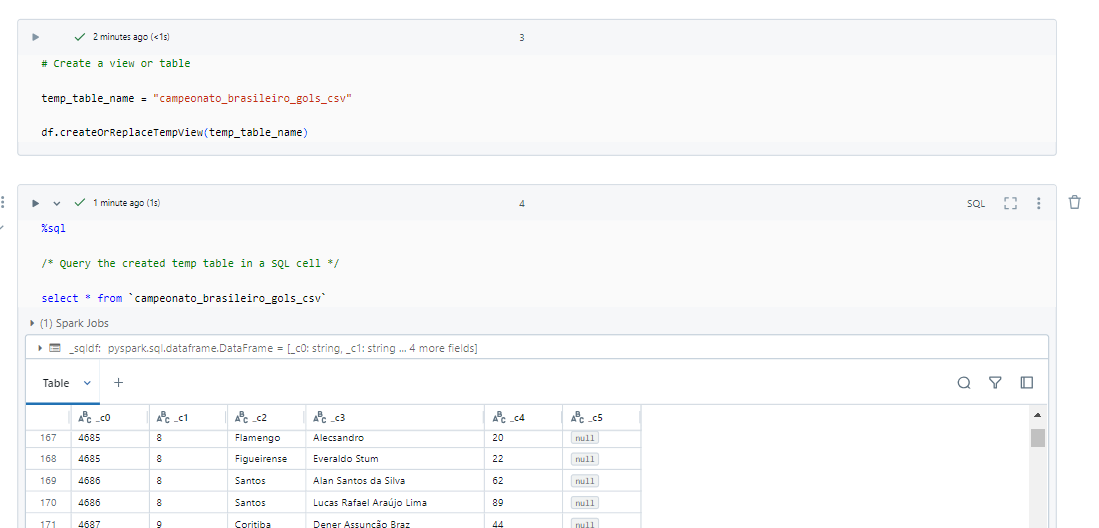

- Salvamento da Tabela Temporária como Permanente

A tabela temporária foi registrada como uma tabela permanente no Databricks. Utilizou-se o formato Parquet para salvar a tabela, garantindo que ela estará disponível para futuras análises, mesmo após reinicializações do cluster.

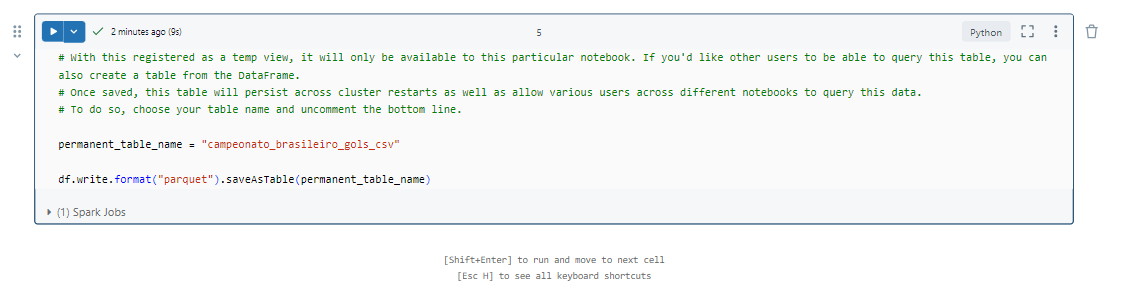

- Clonagem do Notebook

Para reutilizar o código e criar outras tabelas, foi utilizada a funcionalidade de clonagem do notebook no Databricks. Isso permite replicar o mesmo processo de leitura e criação de tabelas para os outros arquivos CSV de forma eficiente e sem necessidade de reescrever o código.

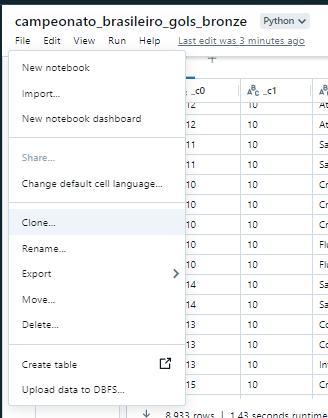

- Verificação das Tabelas Criadas

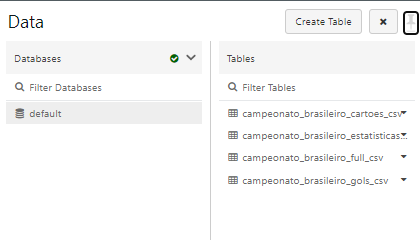

campeonato_brasileiro_cartoes_csv: Contém informações sobre cartões recebidos pelos jogadores.

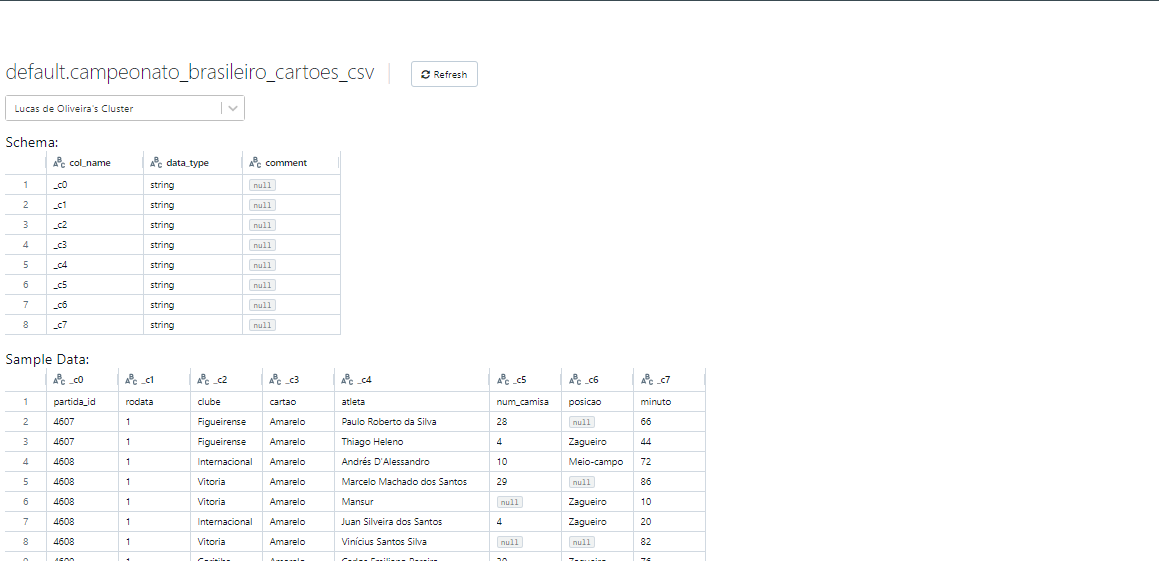

campeonato_brasileiro_estatisticas_full_csv: Inclui estatísticas detalhadas das partidas.


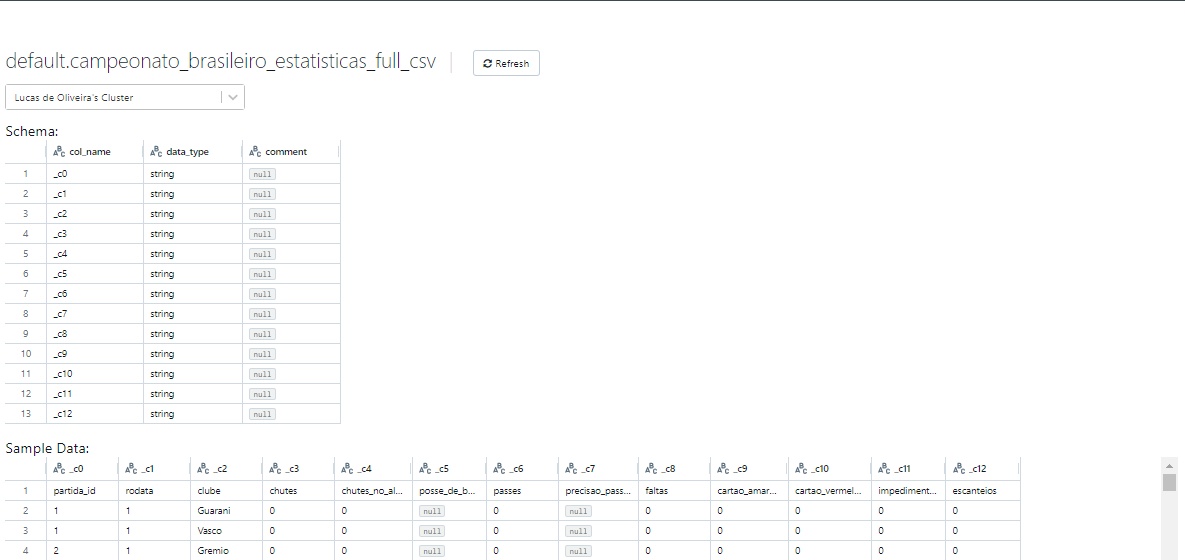

campeonato_brasileiro_full_csv: Abrange dados completos das partidas, como formações de times e técnicos.

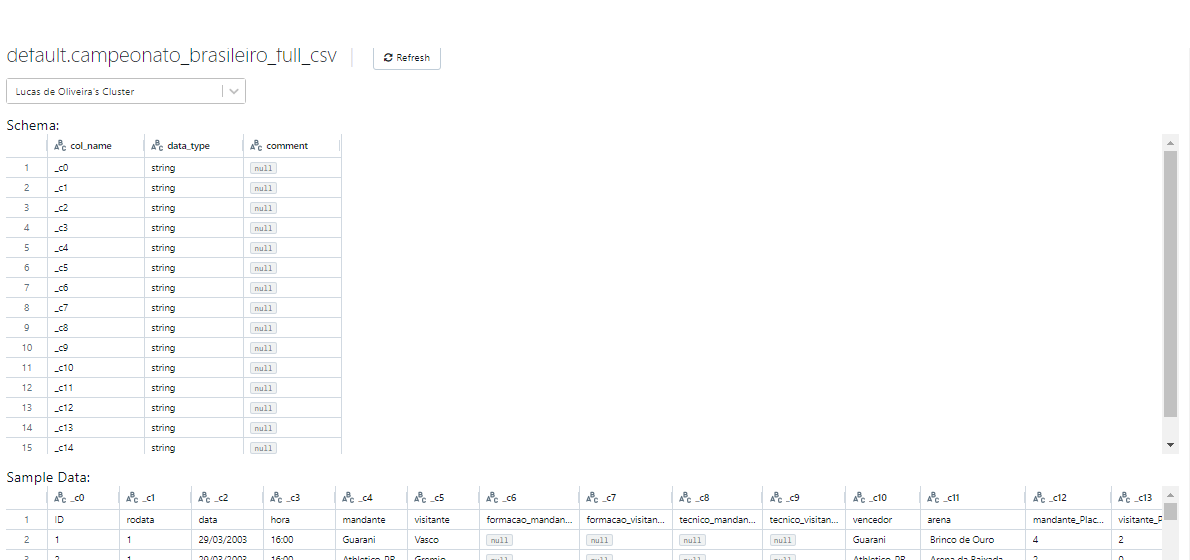

campeonato_brasileiro_gols_csv: Detalha os gols marcados em cada partida.


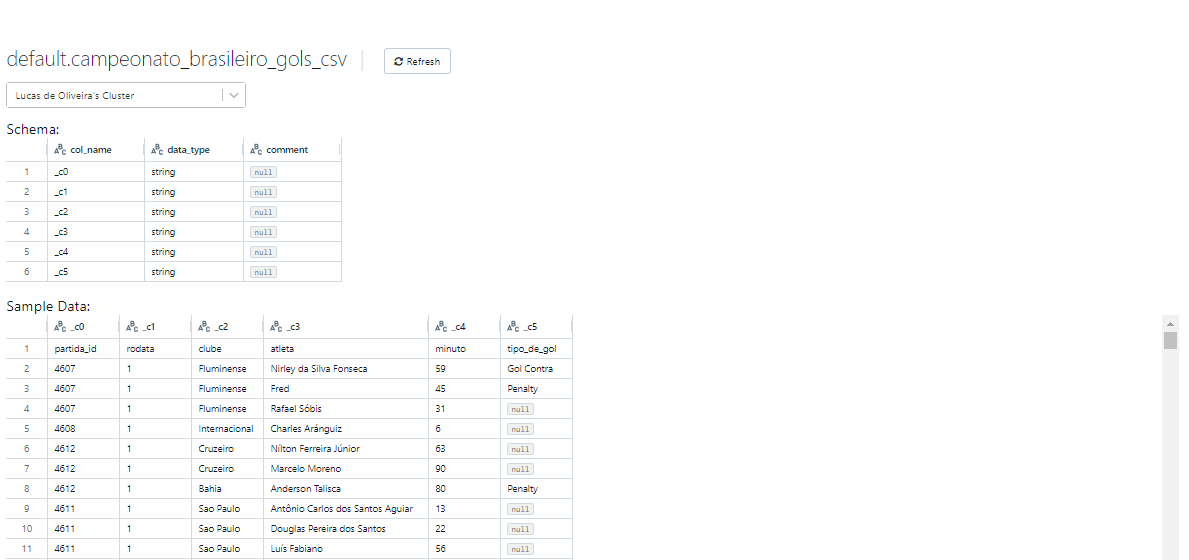

Finalmente, foi verificado as tabelas criadas no Databricks. As tabelas incluem informações de cartões, estatísticas, partidas completas e gols. A estrutura e amostras dos dados foram analisadas para garantir que todas as colunas foram importadas corretamente. Como pode ser visto nas imagens acima, os arquivos CSV possuem valores nulos e inconsistências que precisarão ser tratadas. Essa etapa é conhecida como fase bronze, onde se lida com dados brutos.

###4.2. Camada Silver: Limpeza e Transformação dos Dados


- Neste trecho de código, foram importadas as bibliotecas necessárias e definida uma função para exibir valores nulos nos DataFrames. Em seguida, foram carregadas as tabelas brutas (Bronze) com dados do campeonato brasileiro e renomeadas as colunas para nomes mais descritivos. A renomeação facilita a manipulação e compreensão dos dados nas etapas seguintes do processamento.

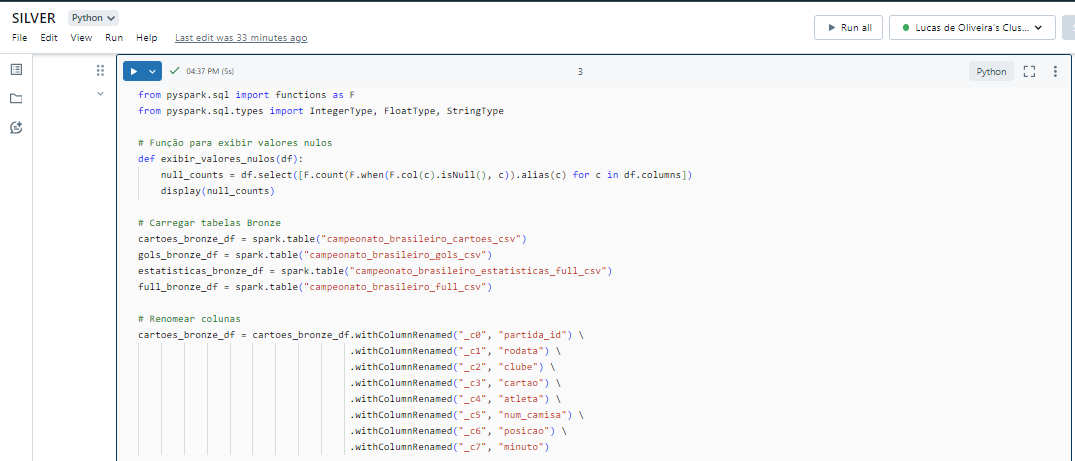

- A renomeação das colunas foi continuada, agora para as tabelas de gols e estatísticas. O objetivo é transformar os nomes das colunas em algo mais significativo e intuitivo, facilitando a leitura e o entendimento dos dados que estão sendo manipulados.


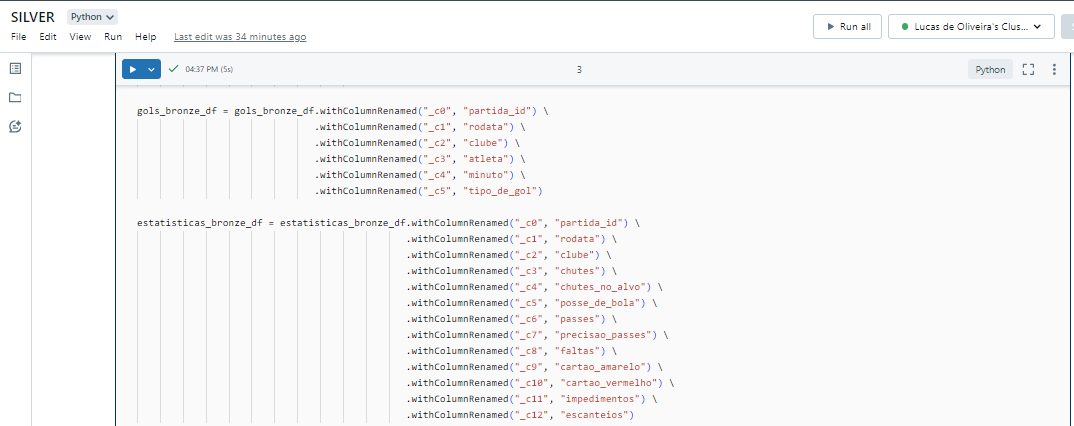

- Neste trecho, foram renomeadas as colunas da tabela full_bronze_df para melhorar a clareza dos dados. Também foi iniciada a conversão dos tipos de dados de certas colunas para tipos mais apropriados, como IntegerType, garantindo que os dados estejam no formato correto para futuras análises.



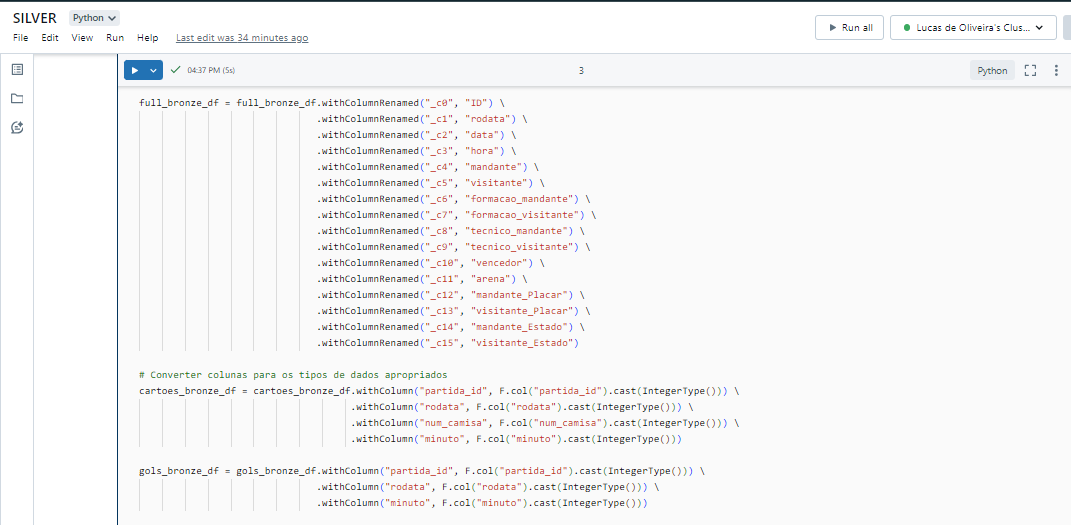

- Aqui, a conversão dos tipos de dados foi continuada para as tabelas de estatísticas e a tabela completa. A verificação do esquema das tabelas permite confirmar que todas as colunas estão com os tipos de dados corretos, evitando problemas em operações posteriores.

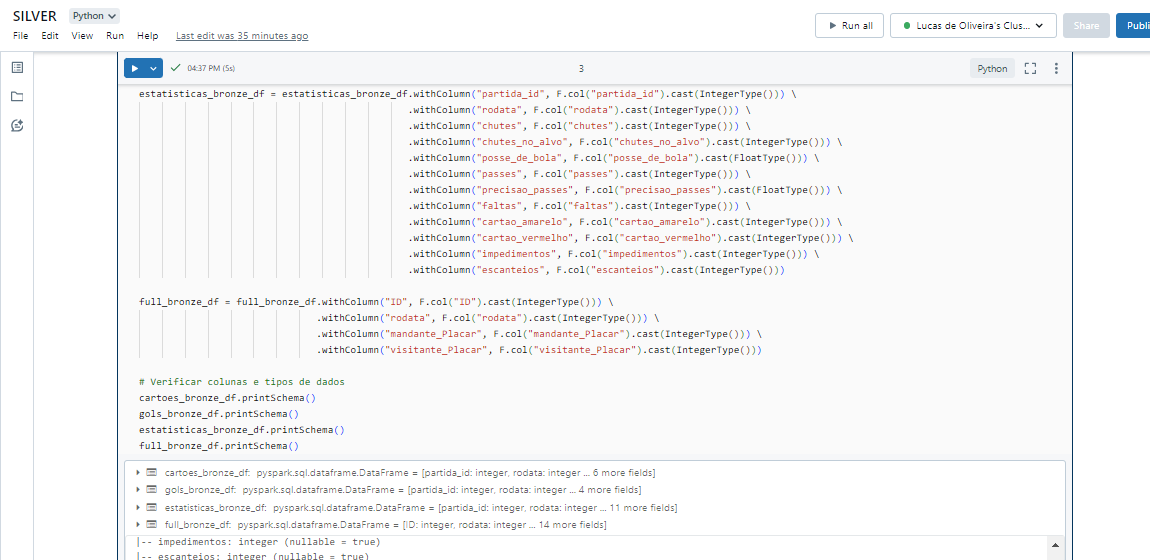

- Foi realizada a limpeza de dados na tabela de cartões. Foram removidas duplicatas, preenchidos valores nulos com valores padrão e removidas linhas com valores nulos em colunas essenciais. Essa etapa é crucial para garantir a integridade dos dados, evitando a perda significativa de informações importantes ao preencher valores nulos em vez de deletar linhas inteiras. Em seguida, foi criada uma tabela temporária e o DataFrame limpo foi salvo como uma tabela permanente.

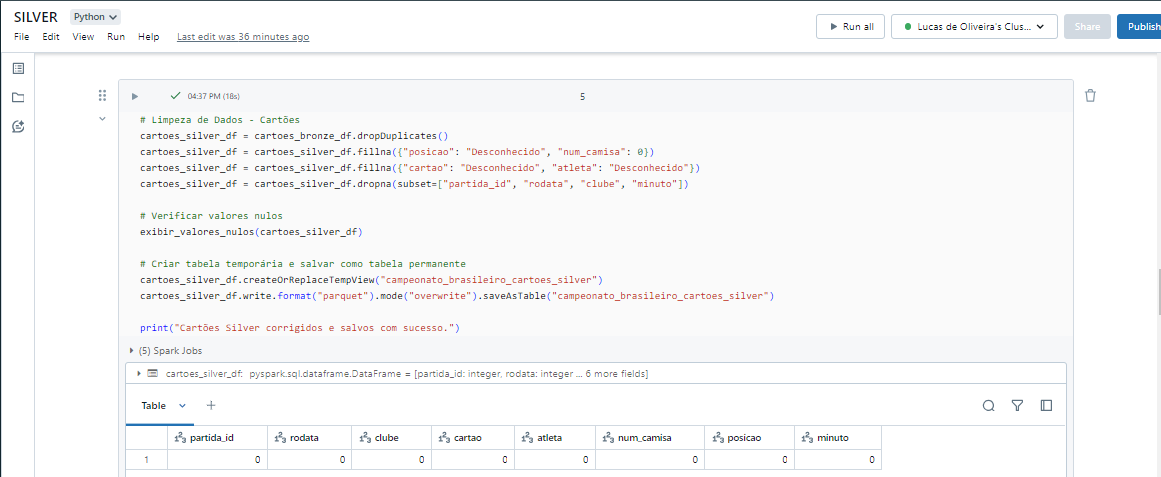

- A limpeza de dados para a tabela de gols segue um processo semelhante ao anterior. Foram removidas duplicatas, preenchidos valores nulos com valores padrão e removidas linhas com valores nulos em colunas essenciais. Isso garante que os dados sejam consistentes e completos para análises futuras. O DataFrame resultante foi salvo como uma tabela permanente no formato Parquet.

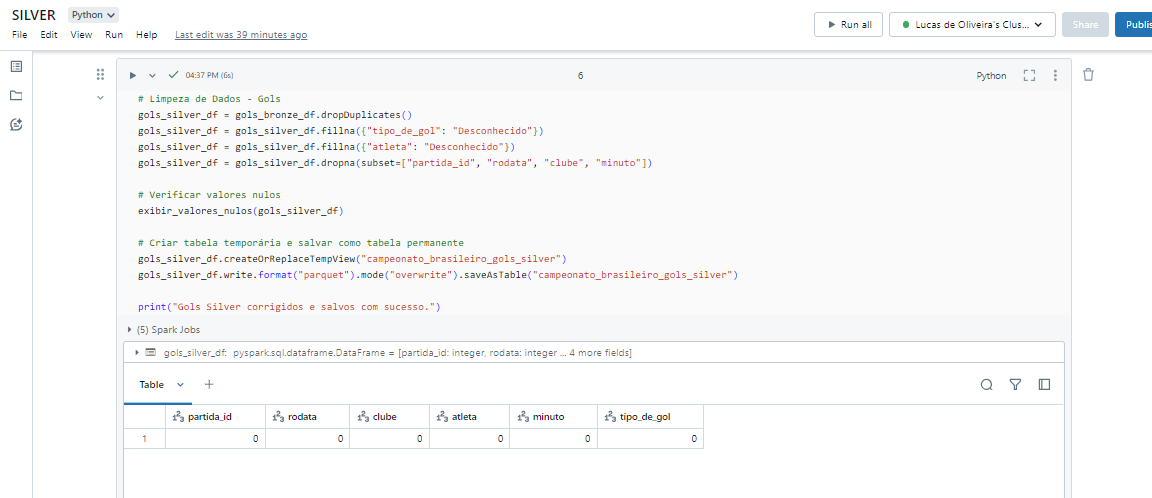

- Para a tabela de estatísticas, além de remover duplicatas e preencher valores nulos, foi calculada a média de precisao_passes e utilizado esse valor para preencher os valores nulos nessa coluna. Isso foi feito para manter a integridade dos dados sem perder muita informação valiosa. Após essa limpeza, o DataFrame foi salvo como uma tabela permanente.

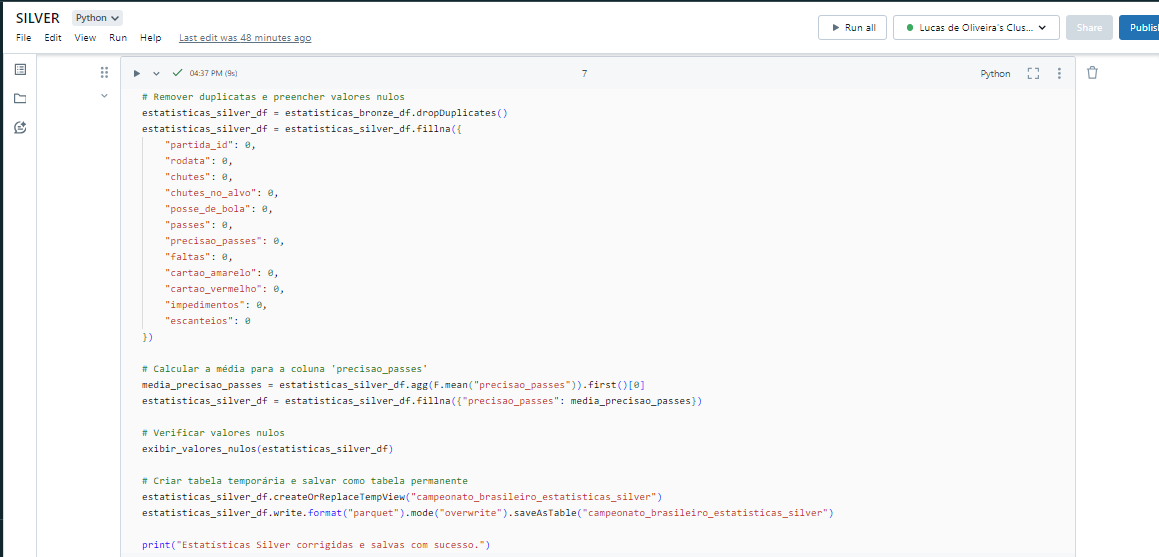

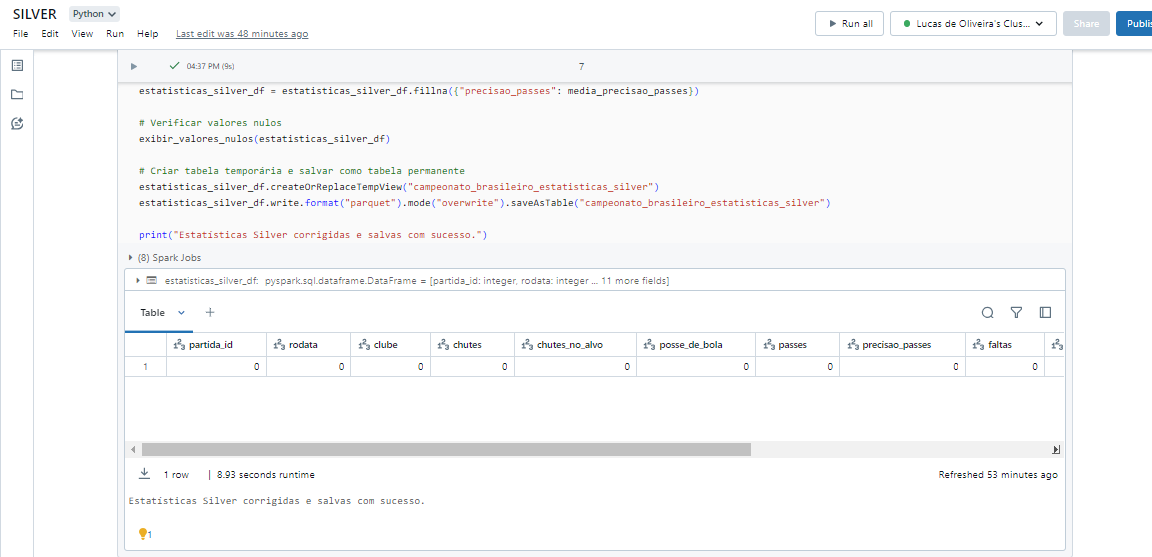

- Por fim, foi realizada a limpeza na tabela completa, removendo duplicatas e preenchendo valores nulos com valores padrão para colunas específicas. Também foram removidas linhas com valores nulos em colunas essenciais para evitar perda de dados críticos. O DataFrame limpo foi salvo como uma tabela permanente, garantindo que os dados estejam prontos para análises detalhadas.

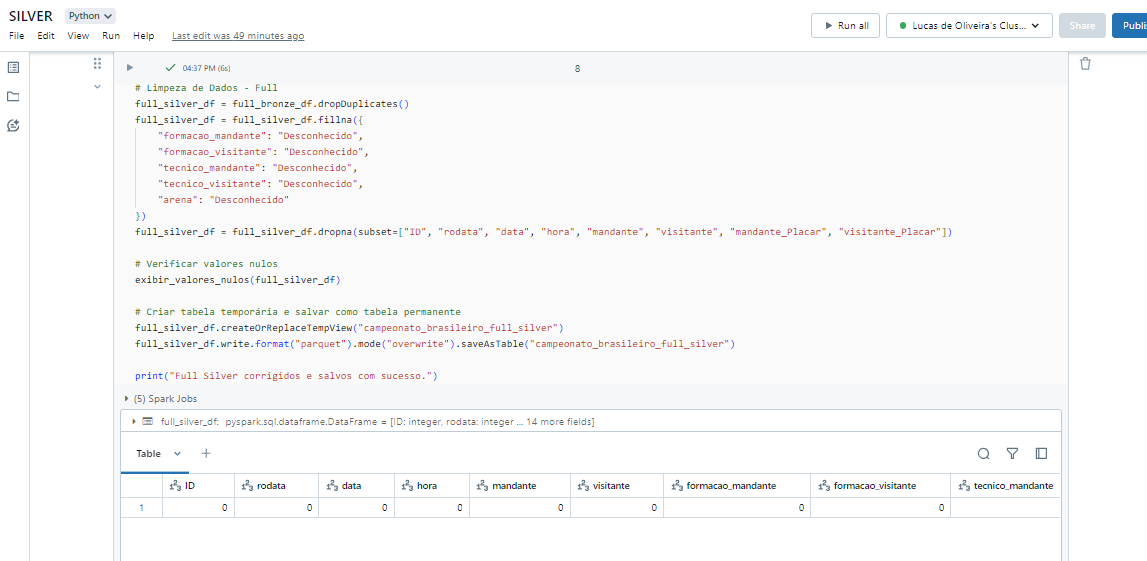

###4.3. Camada Gold

- Neste trecho de código, estão sendo importadas as funções necessárias do PySpark e carregadas as tabelas Silver. As tabelas Silver são a versão limpa e transformada das tabelas Bronze, prontas para análise. Elas contêm informações consolidadas e sem duplicidades dos cartões, gols, estatísticas e detalhes completos dos jogos do campeonato brasileiro.

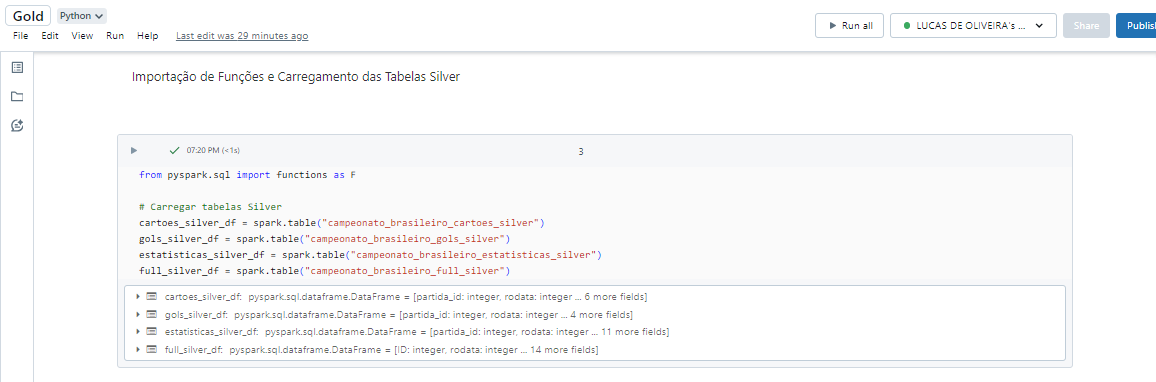

- Está sendo criada a tabela de fatos fatos_clubes, que consolida informações sobre os cartões recebidos pelos clubes e suas vitórias. Os dados são agrupados por clube, calculando o total de partidas com cartões, total de cartões amarelos e vermelhos. Também é calculado o total de vitórias por clube. Em seguida, essas informações são combinadas em uma tabela de fatos completa, calculando a média de cartões amarelos e vermelhos por partida para cada clube. Isso ajudará a responder perguntas como quais clubes recebem mais cartões e quais são os mais vencedores.

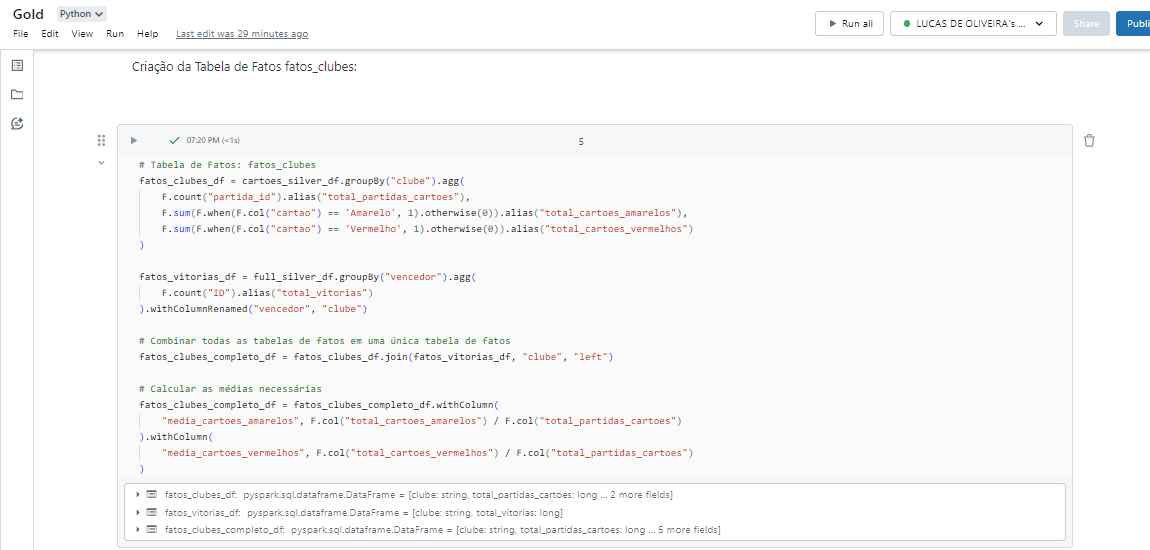

- Neste trecho, foram criadas as tabelas de dimensão necessárias para a análise. A tabela dim_jogadores contém informações únicas sobre os jogadores, incluindo o clube ao qual pertencem, número da camisa e posição. A tabela dim_clubes contém informações sobre os clubes e os estádios onde jogam. A tabela dim_partidas contém detalhes das partidas, como data, hora, clubes envolvidos e placares. Também foi verificada a presença de valores nulos nessas tabelas para garantir a integridade dos dados.

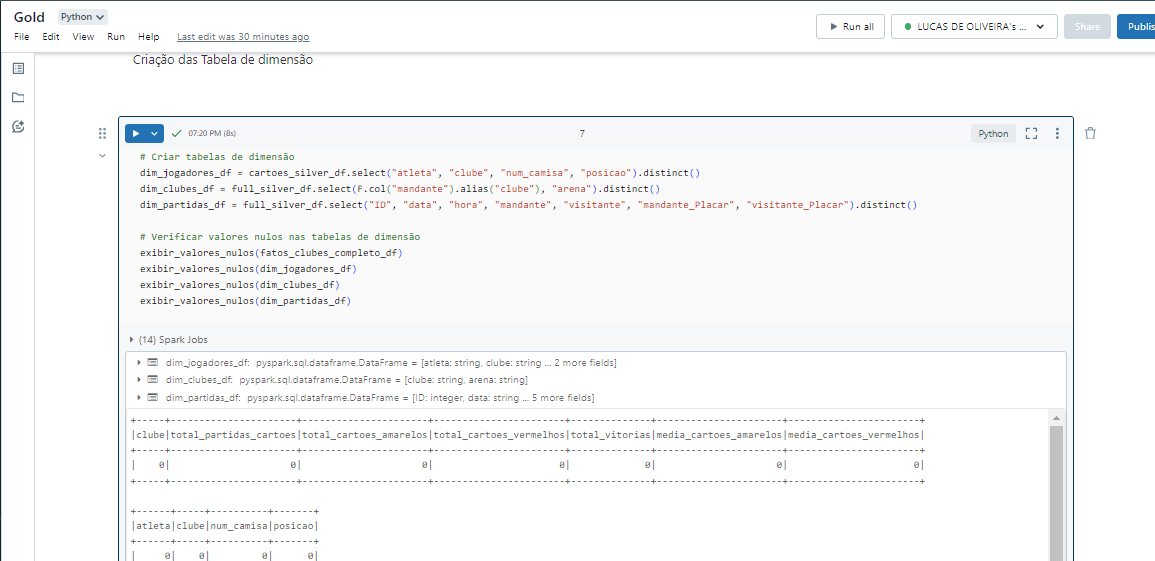

- Neste trecho, foram criadas tabelas temporárias para as tabelas de fatos e dimensões. Em seguida, essas tabelas foram salvas como permanentes no formato Parquet, que é eficiente para armazenamento e processamento de grandes volumes de dados. Essas tabelas Gold estão prontas para serem usadas em análises detalhadas, respondendo perguntas específicas sobre cartões, vitórias, desempenho dos jogadores e características das partidas.

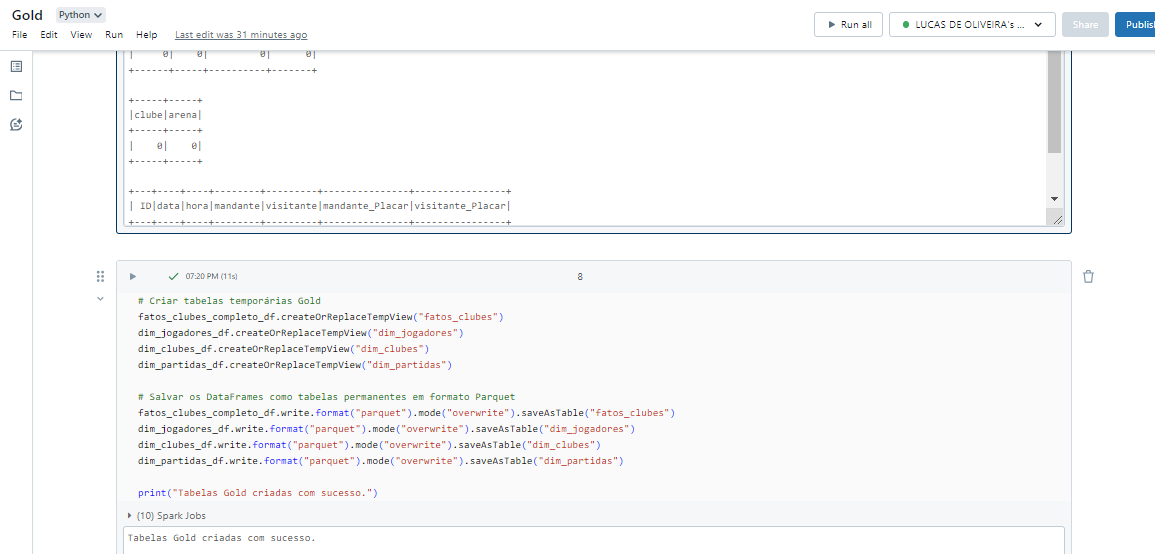

- As tabelas criadas (dim_clubes, dim_jogadores, dim_partidas e fatos_clubes) são essenciais para responder às perguntas e objetivos da análise. Cada tabela contém informações específicas que, quando combinadas, permitem uma análise completa e detalhada dos dados do campeonato brasileiro. Isso inclui identificar clubes e jogadores que recebem mais cartões, analisar o desempenho dos clubes em termos de vitórias e destacar jogadores chave pelo tempo de jogo e eficiência em marcar gols.

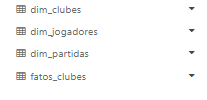

##5. Analise final

###5.1. Qualidade dos dados



- Este trecho de código SQL verifica a presença de valores nulos em várias colunas da tabela fatos_clubes. O resultado indica que não há valor nulo em nenhuma das colunas analisada. Isso é um bom sinal, pois significa que o dado está completo e pronto para análise.

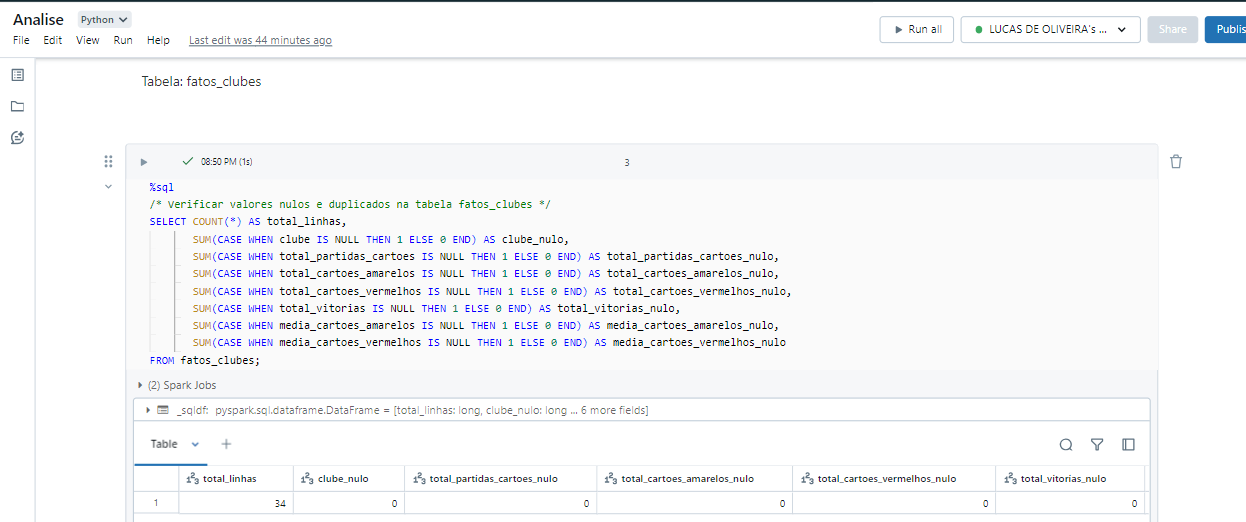

- Aqui, verificamos a presença de registro duplicado na tabela fatos_clubes, agrupando por clube e contando o número de ocorrência para cada clube. A consulta retornou zero resultado, indicando que não há duplicata na tabela fatos_clubes. Isso garante que cada clube está representado apenas uma vez, o que é crucial para análise precisa.

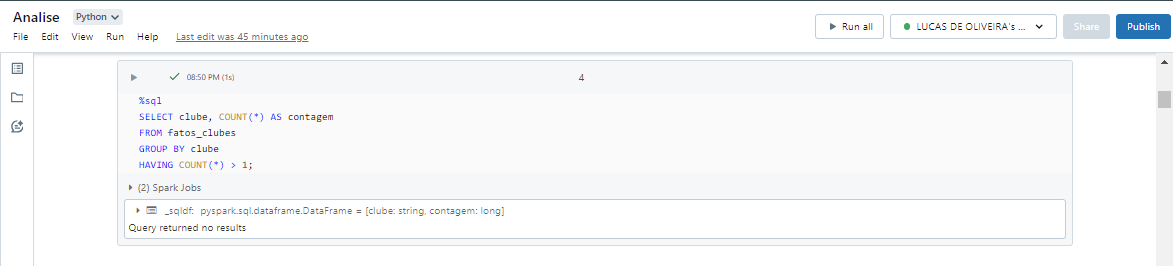

- Esta consulta SQL verifica a presença de valor nulo nas colunas da tabela dim_jogadores. O resultado mostra que não há valor nulo em nenhuma das colunas. Isso assegura que todas as informações do jogador estão completas, facilitando análise precisa sobre o comportamento e desempenho dos jogadores.

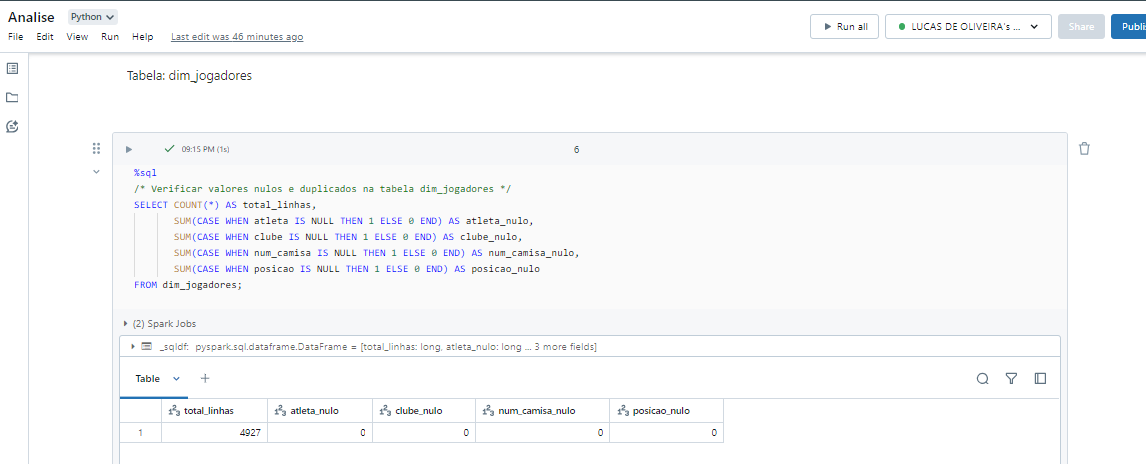

- Neste trecho, verificamos a presença de registro duplicado na tabela dim_jogadores. A consulta retorna zero resultado, indicando que não há duplicata, o que garante que cada combinação de atleta, clube, número de camisa e posição é única.

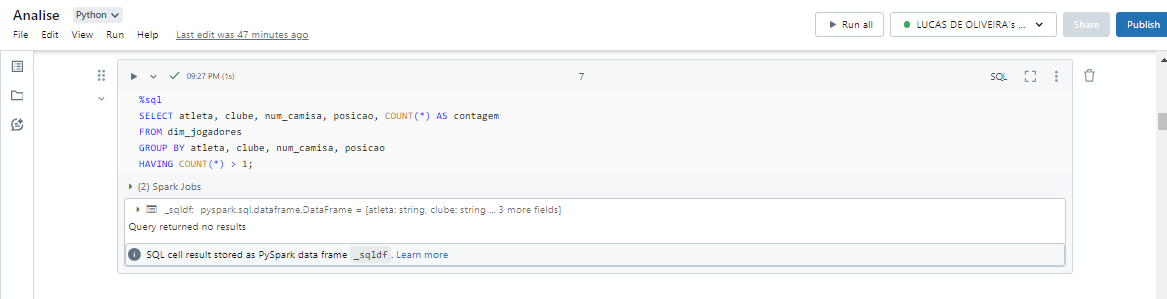

- Aqui, verificamos a presença de valor nulo na tabela dim_clubes. Os resultados mostram que não há valor nulo, indicando que todos os registros possuem informações completas sobre os clubes e as arenas.

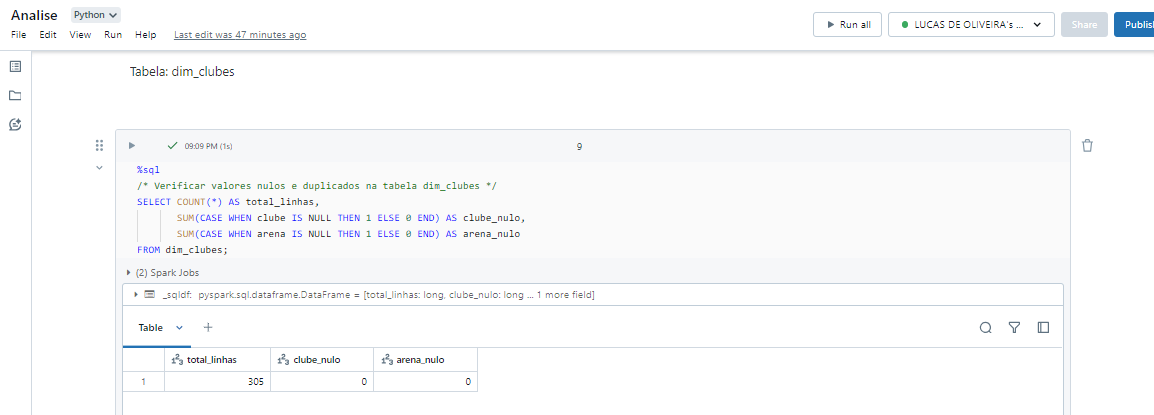

- Esta consulta verifica a presença de registros duplicados na tabela dim_clubes. A ausência de resultados indica que não há duplicatas, assegurando que cada combinação de clube e arena é única.

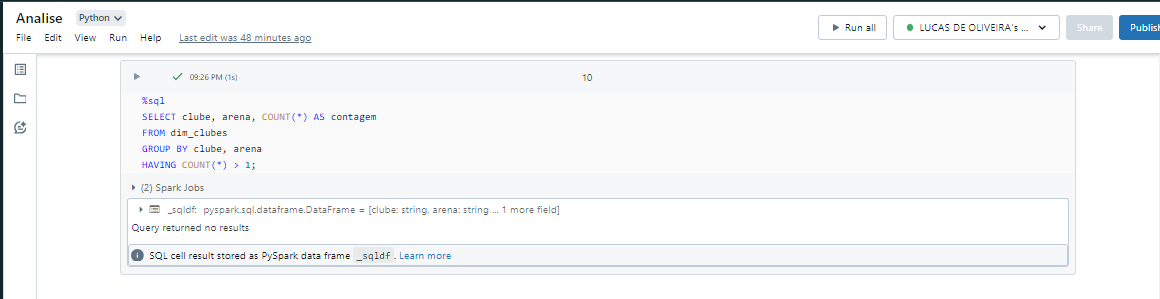

- Esta consulta SQL verifica a presença de valor nulo nas colunas da tabela dim_partidas. Os resultados mostram que não há valor nulo em nenhuma das colunas, assegurando que todos os registros possuem informações completas sobre as partidas.

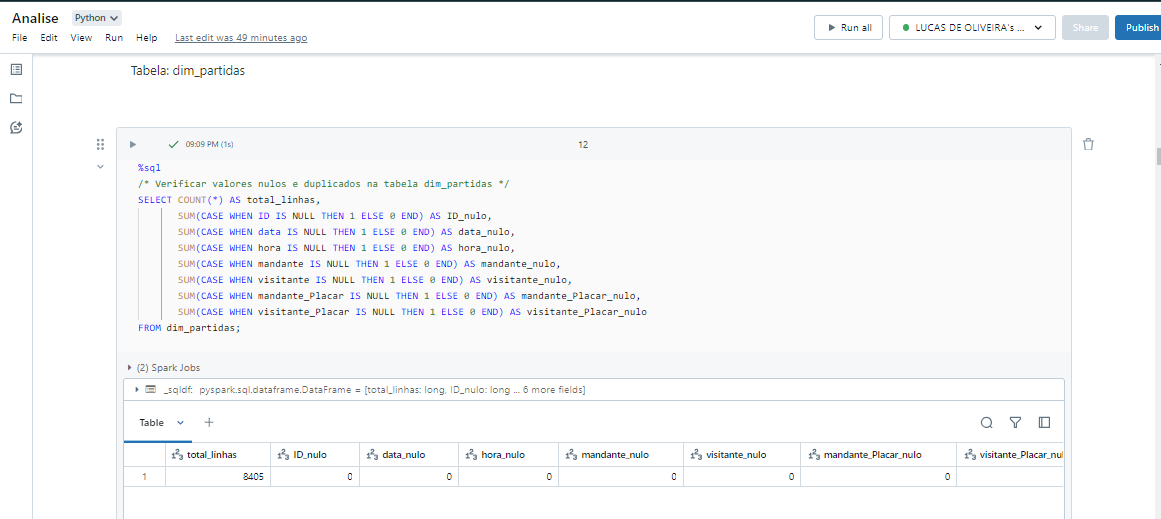

- Neste trecho, verificamos a presença de registro duplicado na tabela dim_partidas. A ausência de resultados indica que não há duplicata, garantindo que cada partida é única.

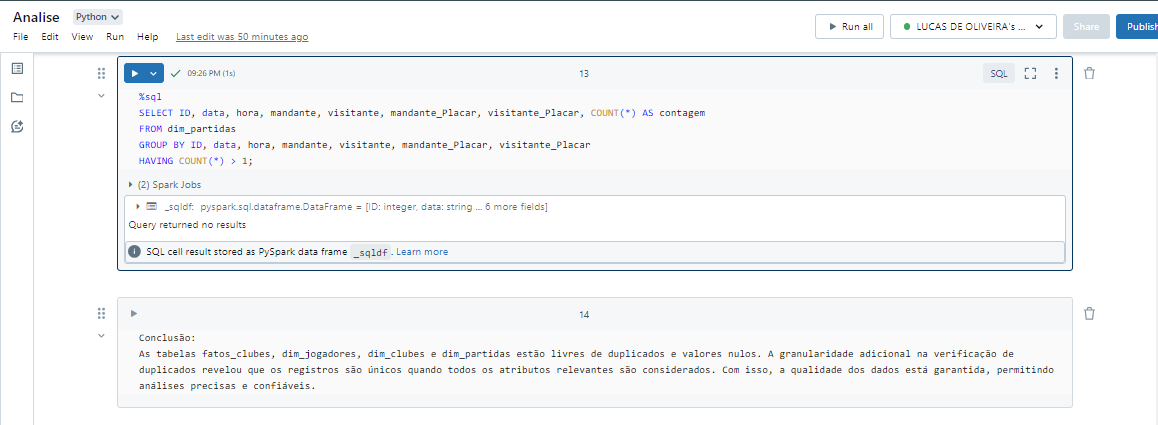

- As tabelas fatos_clubes, dim_jogadores, dim_clubes e dim_partidas estão livres de valores nulos e duplicados. A granularidade adicional na verificação de duplicados revelou que os registros são únicos quando todos os atributos relevantes são considerados. Com isso, a qualidade dos dados está garantida, permitindo análises precisas e confiáveis.

- Verificação de Valores Duplicados:
Para verificar valores duplicados, as tabelas foram agrupadas por colunas-chave e verificou-se a contagem de registros para identificar possíveis duplicações. No entanto, em alguns casos, como nas tabelas dim_jogadores e dim_clubes, pode haver duplicações devido a jogadores que jogaram por mais de um time ou outras razões contextuais. Contudo, com a abordagem utilizada, nenhum registro duplicado foi encontrado, indicando que os dados foram bem consolidados.

- Observação sobre a tabela fatos_clubes:
Apesar de fatos_clubes possuir poucas linhas, isso se deve ao fato de que a tabela agrega muitas informações específicas, como total de partidas com cartões, vitórias e médias de cartões por clube. Como nem todas as informações podem estar completas para todos os clubes, isso resulta em um número menor de registros na tabela de fatos em comparação com outras tabelas mais gerais.

###5.2. Solução do problema




- A partir da utilização do SQL para responder às perguntas que formulamos nas etapas iniciais, obtivemos resultados esclarecedores e fundamentais para nosso projeto. Confira abaixo os principais insights alcançados:

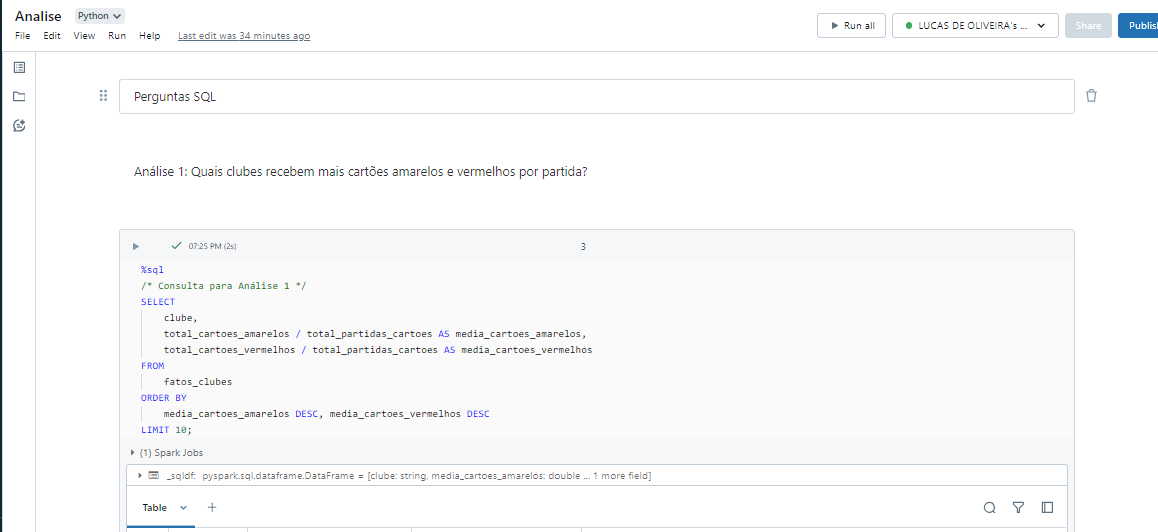

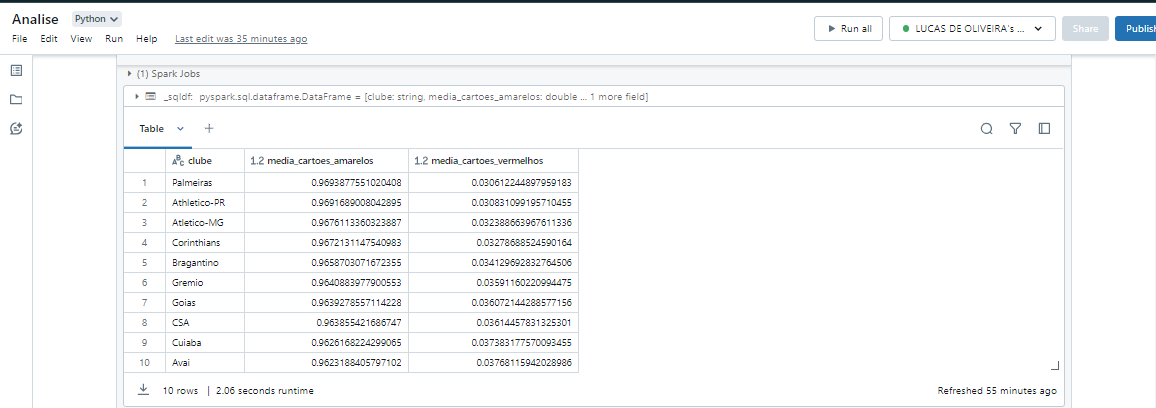

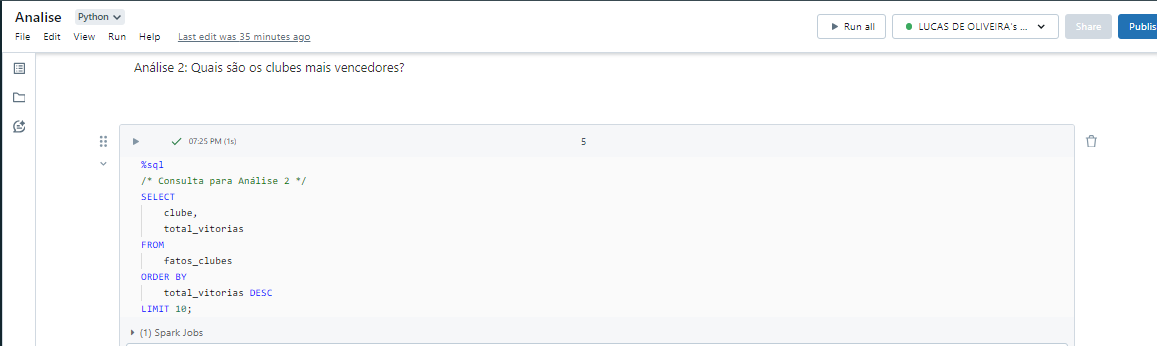

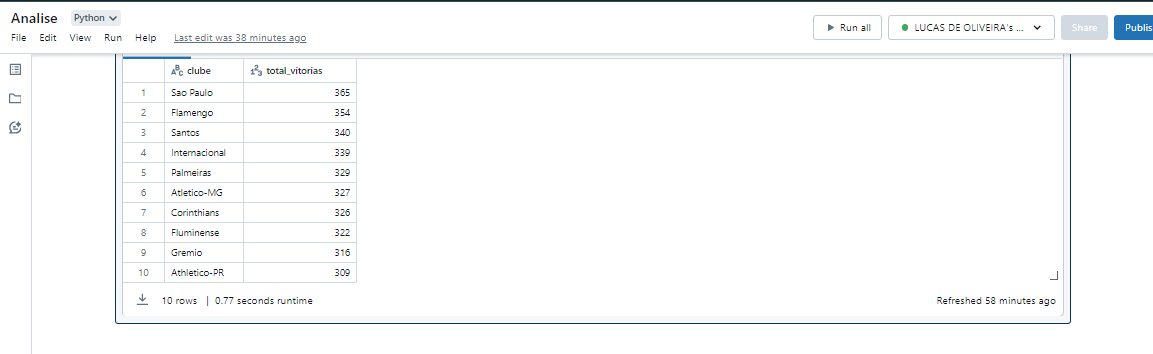

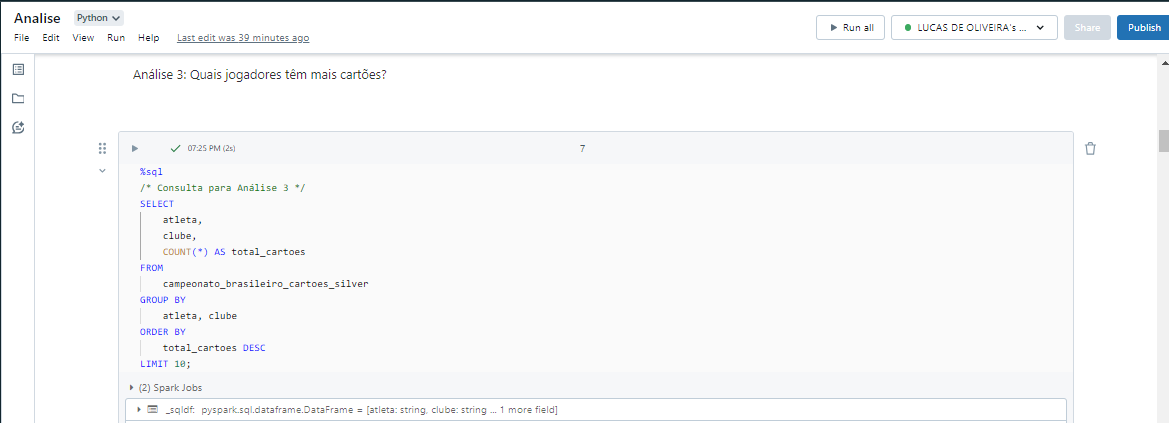

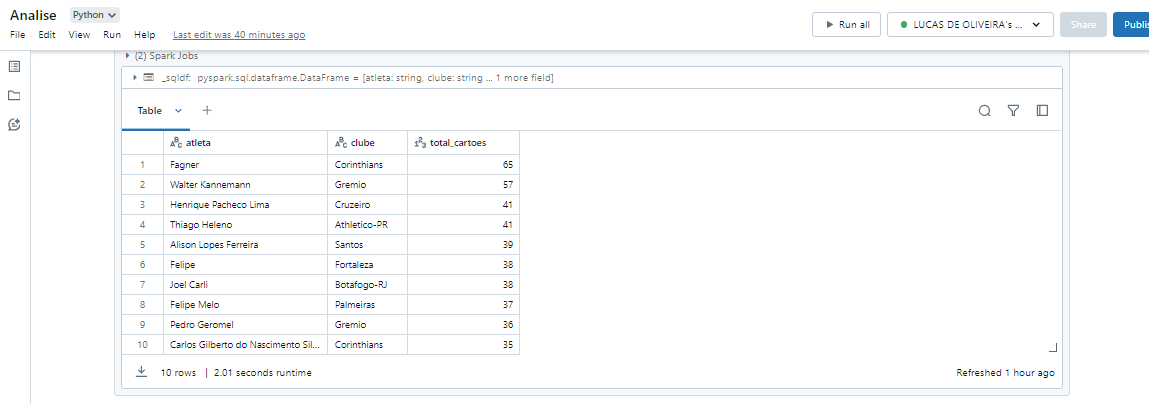

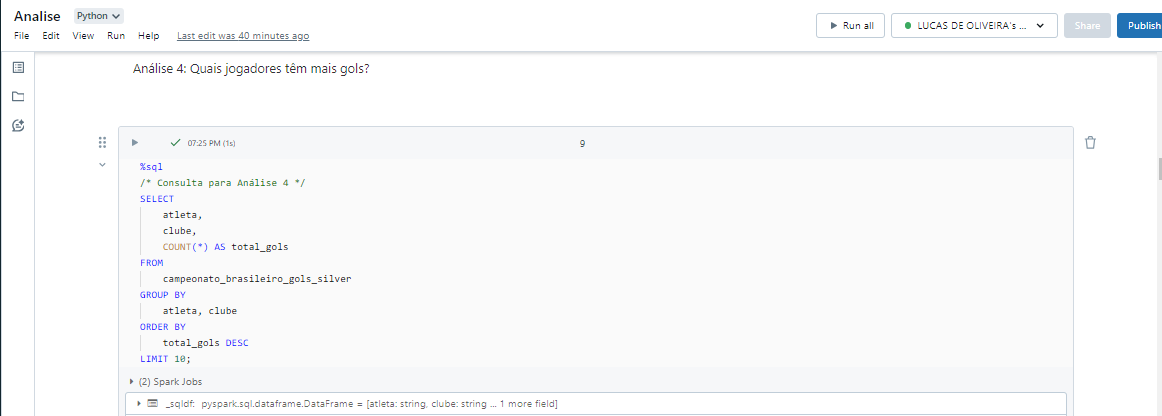

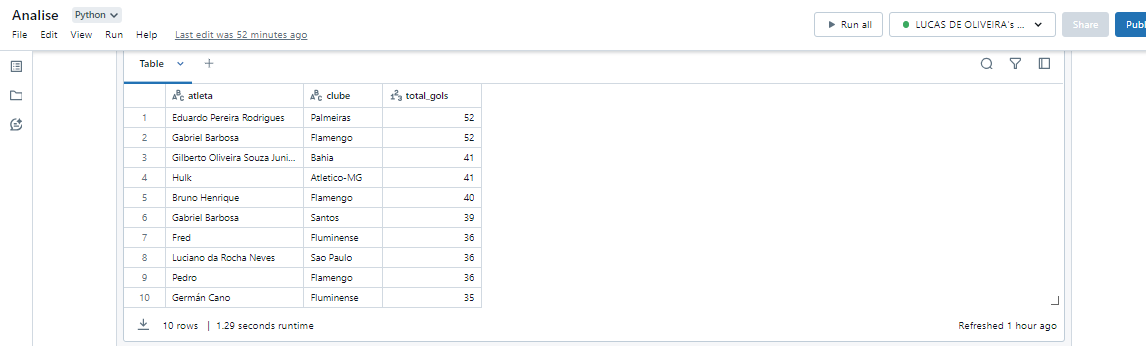

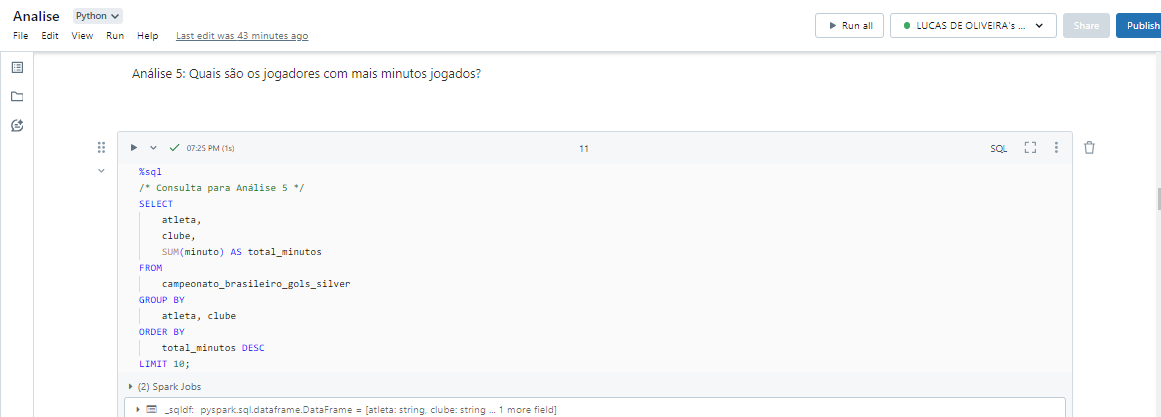

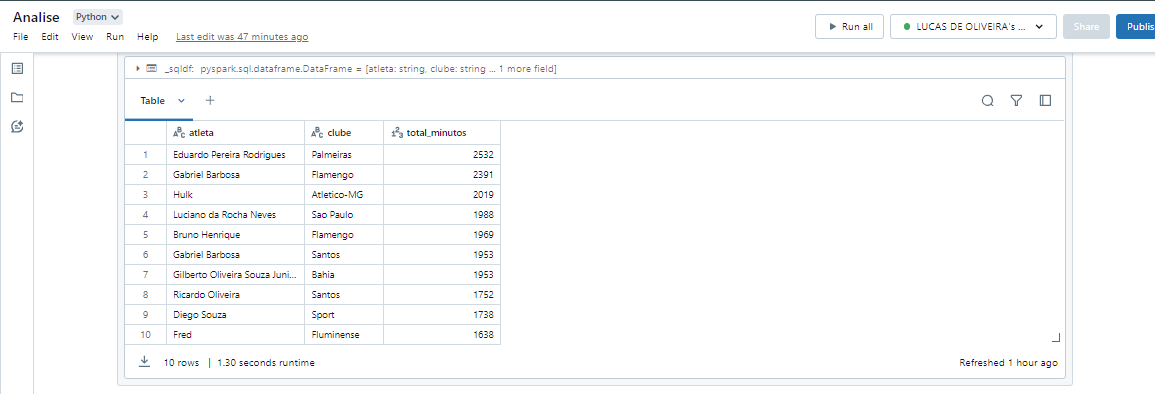

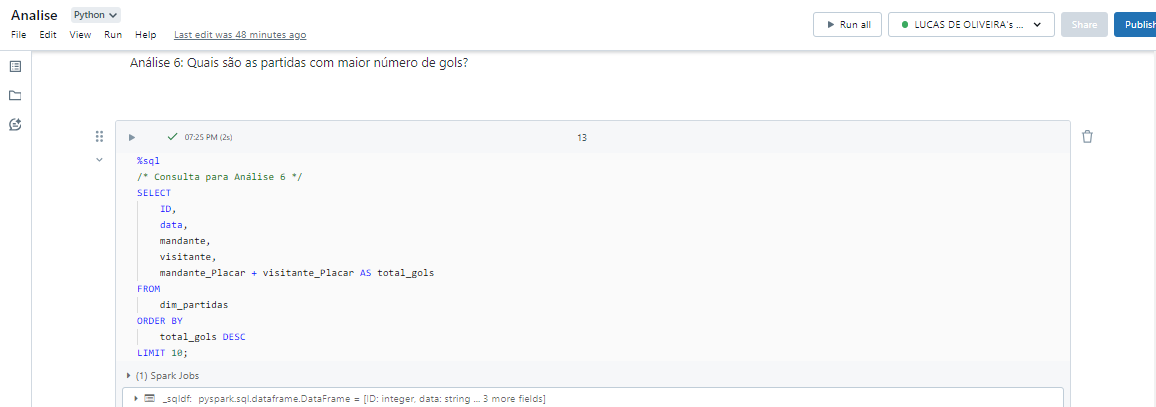

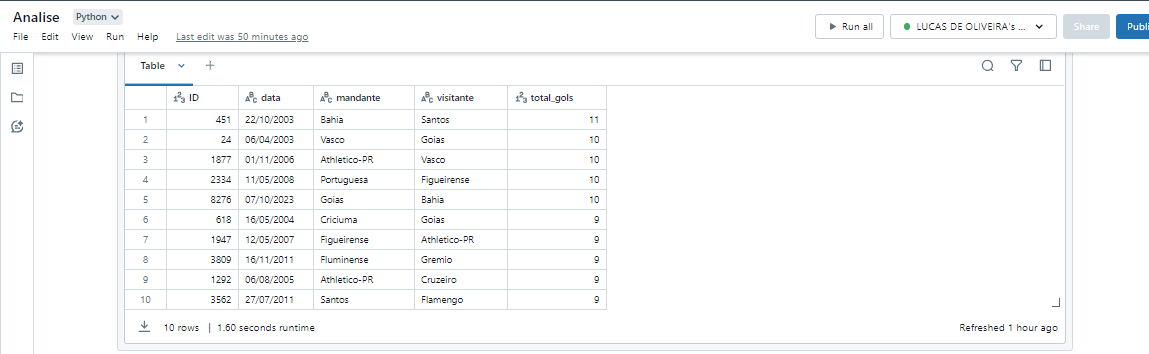

###5.3. Gráficos para uma Análise Mais Detalhada

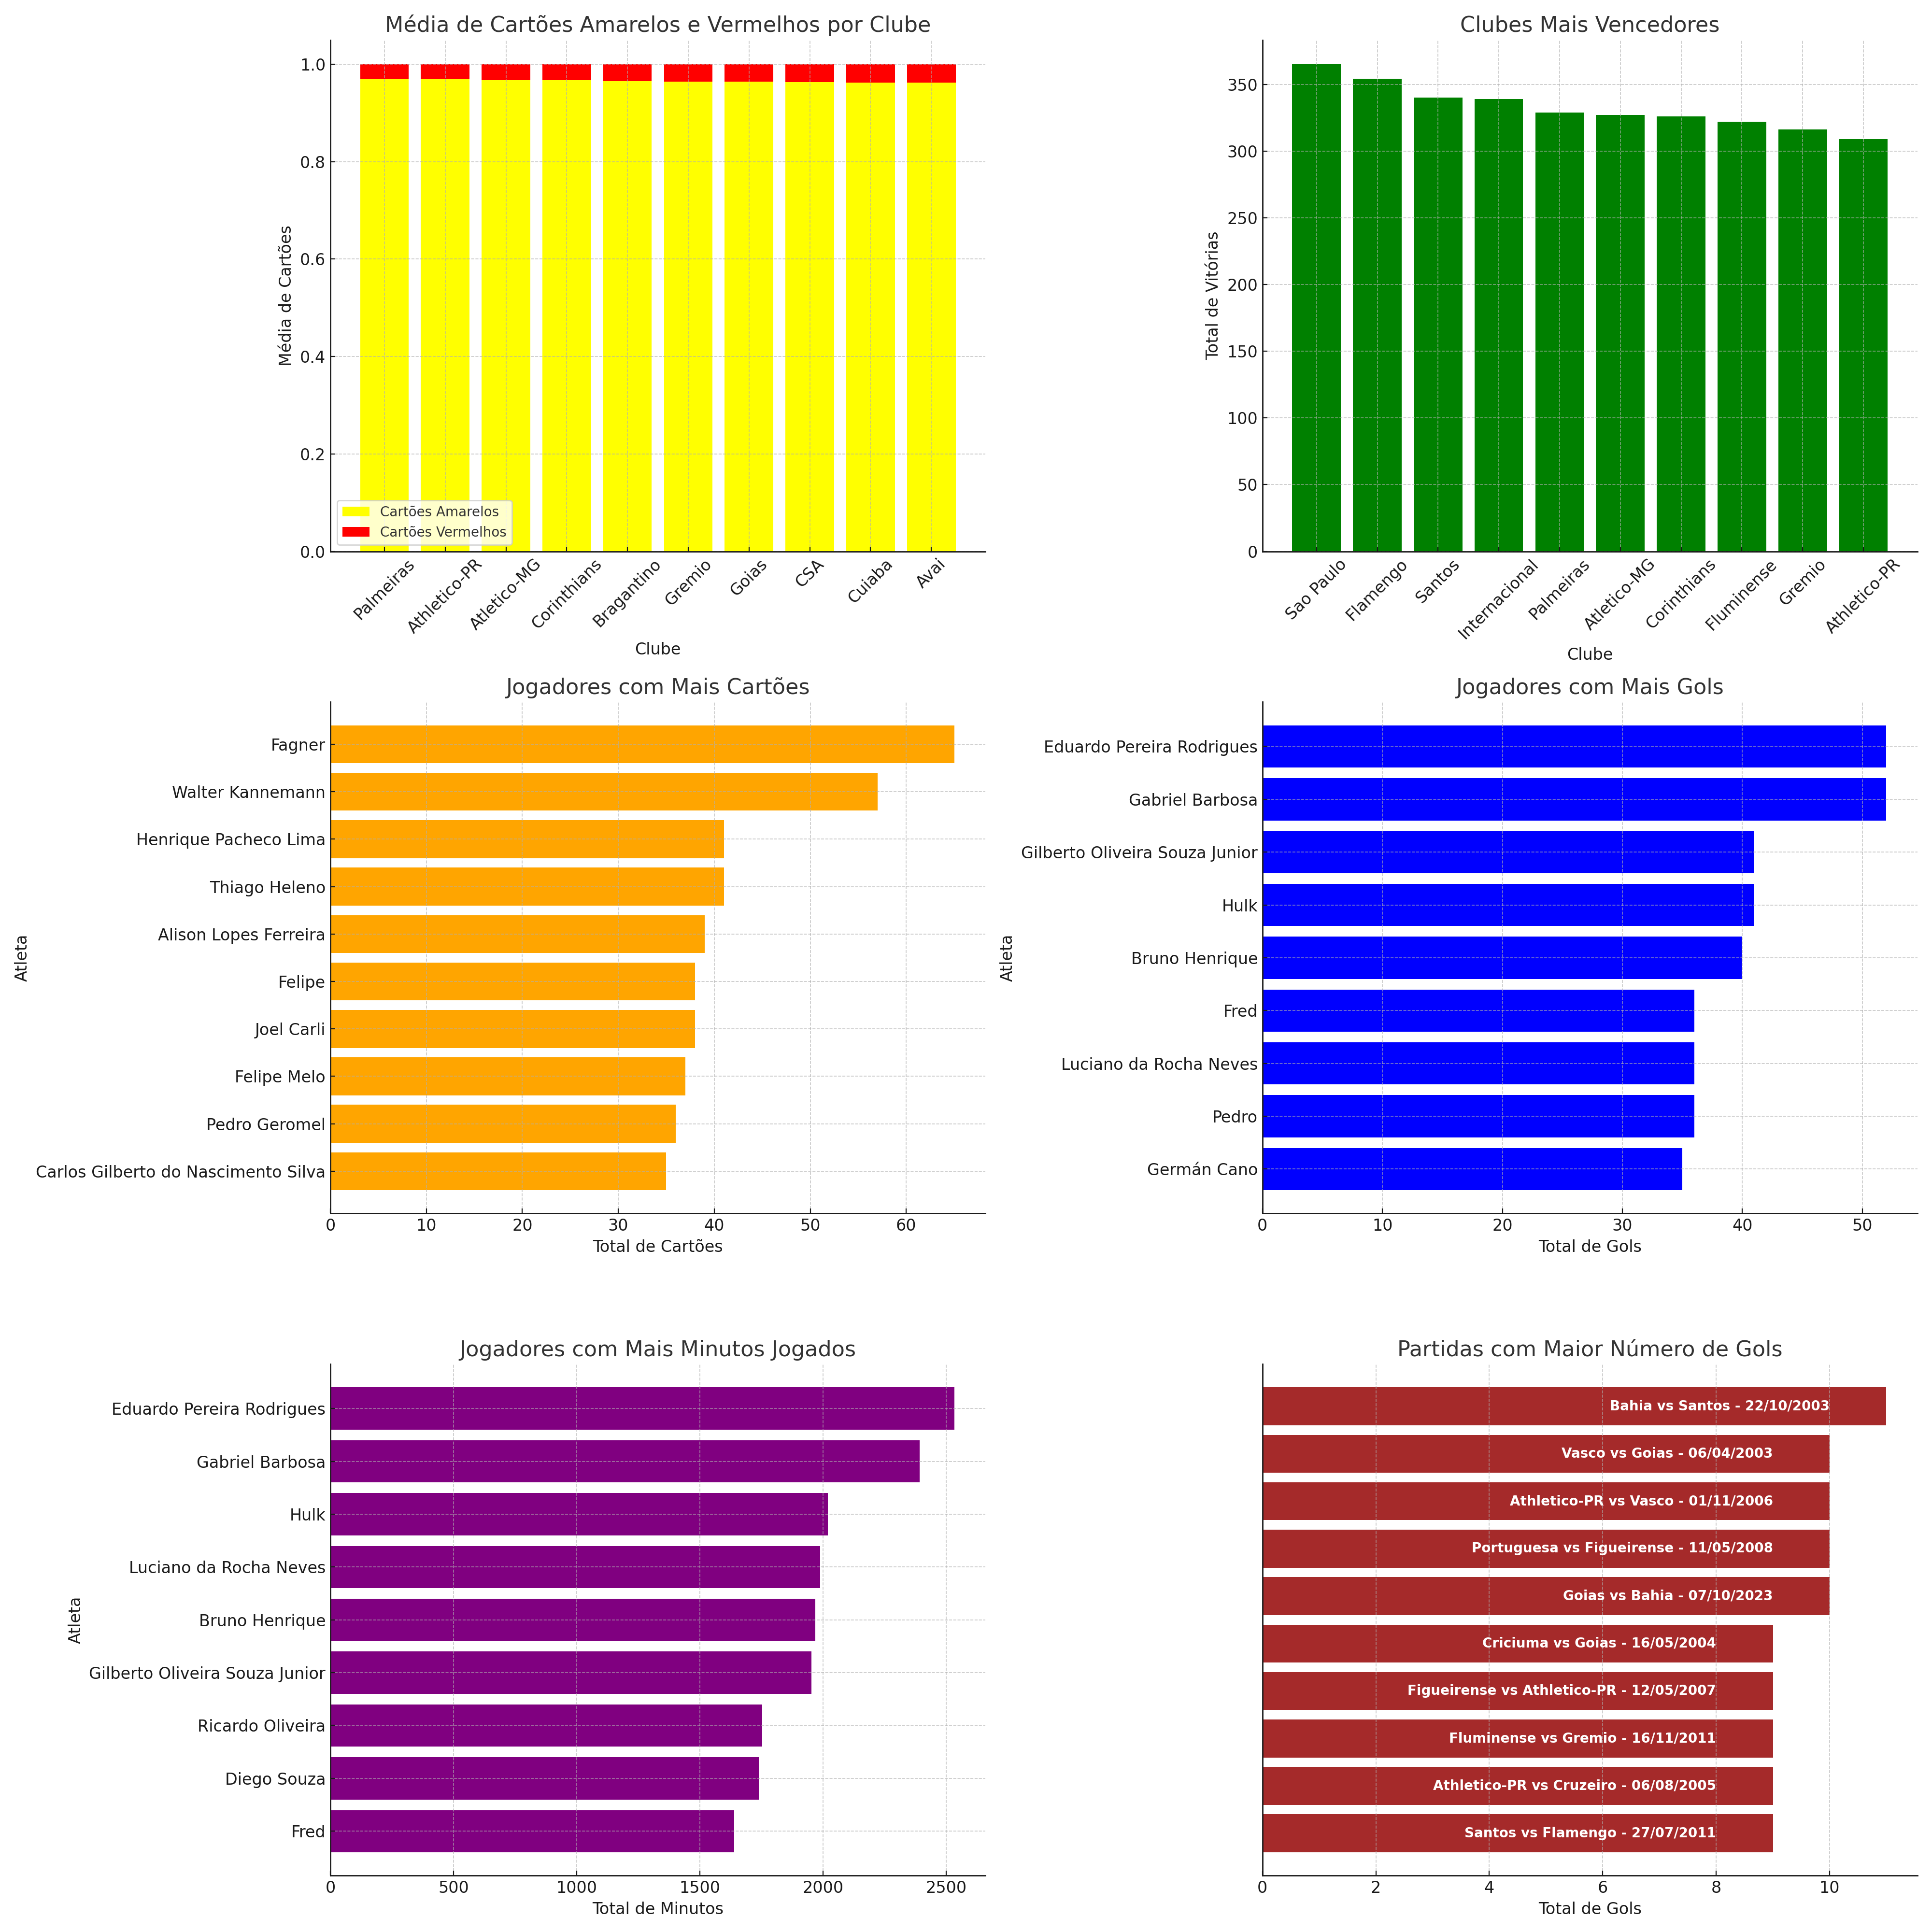

###5.4. Conclusão

Este projeto analisou diversos aspectos do Campeonato Brasileiro de Futebol, utilizando um conjunto de dados disponível no Kaggle. As perguntas abordam a disciplina, eficiência, tempo de jogo e emoção das partidas. A seguir, apresentamos as análises realizadas com base nessas perguntas.

#### Análise 1: Quais clubes recebem mais cartões amarelos e vermelhos por partida?
**Resultados**:
Os clubes que mais recebem cartões amarelos por partida são Palmeiras, Athletico-PR e Atletico-MG. Esses clubes também apresentam uma média alta de cartões vermelhos, sugerindo um estilo de jogo mais agressivo, o que pode resultar em penalizações que afetam seu desempenho em campo.

#### Análise 2: Quais são os clubes mais vencedores?
**Resultados**:
São Paulo é o clube mais vencedor com 365 vitórias, seguido por Flamengo e Santos, com 354 e 340 vitórias, respectivamente. Esses clubes demonstram consistência em seu desempenho ao longo dos anos, provavelmente devido a uma combinação de bons jogadores, treinadores competentes e estratégias eficazes.

#### Análise 3: Quais jogadores têm mais cartões?
**Resultados**:
Fagner do Corinthians é o jogador com mais cartões recebidos (65), seguido por Walter Kannemann do Grêmio (57) e Henrique Pacheco Lima do Cruzeiro (41). Esses jogadores podem ser vistos como mais agressivos ou menos disciplinados, o que pode impactar negativamente suas equipes.

#### Análise 4: Quais jogadores têm mais gols?
**Resultados**:
Eduardo Pereira Rodrigues do Palmeiras e Gabriel Barbosa do Flamengo são os jogadores com mais gols marcados (52 cada). Gilberto Oliveira Souza Junior do Bahia e Hulk do Atletico-MG também estão entre os principais goleadores, mostrando a importância desses jogadores para suas equipes em termos de finalização e habilidade de marcar.

#### Análise 5: Quais são os jogadores com mais minutos jogados?
**Resultados**:
Eduardo Pereira Rodrigues do Palmeiras é o jogador com mais minutos jogados (2532), seguido por Gabriel Barbosa do Flamengo (2391) e Hulk do Atletico-MG (2019). Esses jogadores são fundamentais para suas equipes, não apenas por sua habilidade, mas também por sua resistência e confiabilidade.

#### Análise 6: Quais são as partidas com maior número de gols?
**Resultados**:
A partida entre Bahia e Santos em 22/10/2003 teve o maior número de gols (11), seguida pelas partidas entre Vasco e Goias em 06/04/2003 e Athletico-PR e Vasco em 01/11/2006, ambas com 10 gols. Essas partidas são exemplos de alta competitividade e habilidades ofensivas dos times.

### Insights Adicionais

1. **Disciplina vs. Desempenho**:
   Há uma correlação interessante entre clubes que recebem mais cartões e seu desempenho geral. Clubes com mais cartões podem precisar equilibrar melhor sua agressividade com disciplina para melhorar seu desempenho.

2. **Jogadores-Chave**:
   Os jogadores que mais marcam gols e jogam mais minutos são essenciais para o sucesso de suas equipes, mostrando a importância de ter jogadores confiáveis e eficientes.

3. **Partidas Emocionantes**:
   As partidas com mais gols são indicativas de alta competitividade e emoção, o que pode atrair mais espectadores e aumentar o interesse no campeonato.

### Considerações Finais

A análise dos dados do Campeonato Brasileiro de Futebol revelou insights valiosos sobre a disciplina dos clubes, os principais jogadores e as partidas mais emocionantes. Esses dados indicam que clubes como Palmeiras, Athletico-PR e Atletico-MG têm um estilo de jogo mais agressivo, resultando em mais cartões. Por outro lado, clubes como São Paulo, Flamengo e Santos demonstram consistência em vitórias, provavelmente devido a uma combinação de bons jogadores e estratégias eficazes.

Esses insights podem ser utilizados por clubes e treinadores para ajustar suas estratégias e melhorar seu desempenho no campeonato. A qualidade dos dados, sem valores nulos e duplicados, assegura que essas análises sejam precisas e confiáveis, proporcionando uma base sólida para decisões futuras.